<a href="https://www.kaggle.com/code/anandratna/customer-segmentation?scriptVersionId=139596652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plot_plt
import seaborn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#connect to the dataset to read it.
data_of_customers = pandas.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [3]:
data_of_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data_of_customers.shape


(200, 5)

In [5]:
data_of_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data_of_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
on_x = data_of_customers.iloc[:,[3,4]].values

In [8]:
white = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(on_x)

  white.append(kmeans.inertia_)

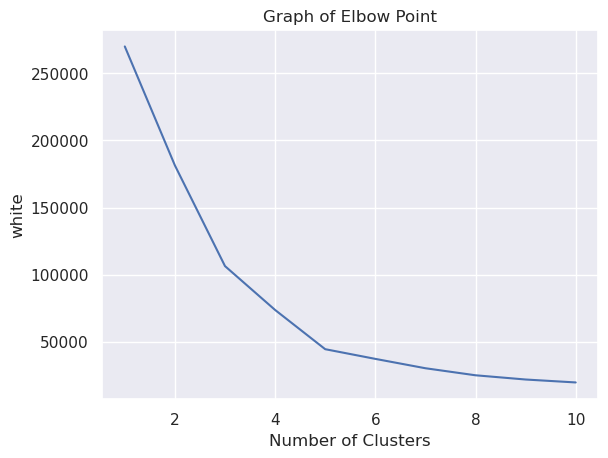

In [9]:
seaborn.set()
plot_plt.plot(range(1,11), white)
plot_plt.title('Graph of Elbow Point')
plot_plt.xlabel('Number of Clusters')
plot_plt.ylabel('white')
plot_plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(on_x)
print(y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


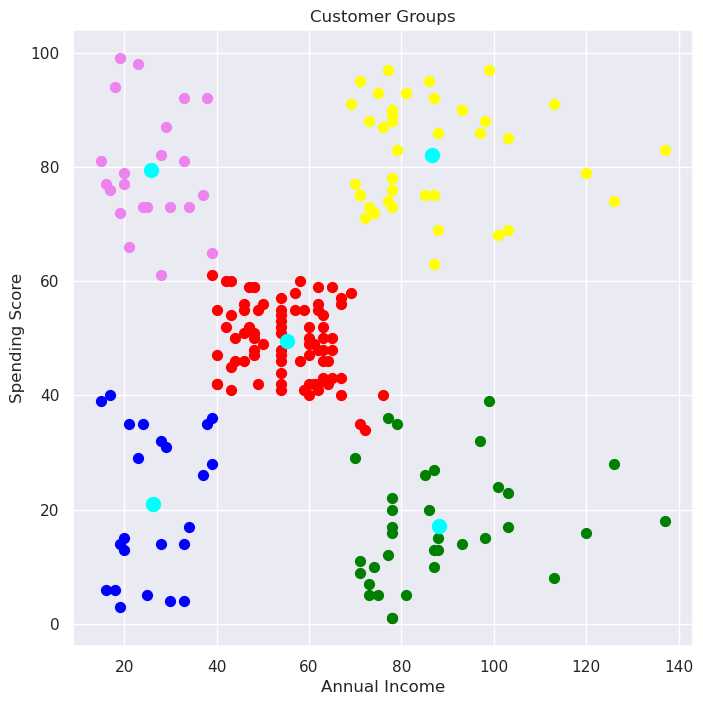

In [11]:
# plotting all the clusters and their Centroids

plot_plt.figure(figsize=(8,8))
plot_plt.scatter(on_x[y==0,0], on_x[y==0,1], s=50, c='green', label='Cluster 1')
plot_plt.scatter(on_x[y==1,0], on_x[y==1,1], s=50, c='red', label='Cluster 2')
plot_plt.scatter(on_x[y==2,0], on_x[y==2,1], s=50, c='yellow', label='Cluster 3')
plot_plt.scatter(on_x[y==3,0], on_x[y==3,1], s=50, c='violet', label='Cluster 4')
plot_plt.scatter(on_x[y==4,0], on_x[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plot_plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plot_plt.title('Customer Groups')
plot_plt.xlabel('Annual Income')
plot_plt.ylabel('Spending Score')
plot_plt.show()

